# Project 2 Report - Dean Knudson

This semester I continued my work on a sentiment analysis engine. The semester began with the revelation that a new library called transformers, by the HuggingFace, had recently been released. This library made fine-tuning some of the SOTA (state of the art) langauage models incredibly simple. With this, I decided to finetune a variety of BERT architures using the custom dataset I created last semester. At the same time another team was working on revamping the existing media analytics website and a sentiment analysis component was requested from me. This progressed into the construction and deployment of a python machine learning for text classification package. I also briefly experimented with the dataset I used in my [special topic](https://github.com/knuddj1/Sentiment-Analysis/blob/master/recap%20stuff/semester_recap.ipynb), to create a 5 label sentiment analysis model, comparing its results with my custom dataset.

---

## [Transformers](https://github.com/huggingface/transformers)

The beginning of this semester yielded a new tool in the NLP community.The work I did [last semester](https://github.com/knuddj1/Project-1-Sentiment-Analysis/blob/master/report.ipynb) was made fairly irrelevant by transformers. Created by the HuggingFace team, transformers took all the difficult implementation details out of using the recent, powerful,transformer based, language models and provided a fairly compact python interface for interacting with them. Originally transformers only supported using the popular machine learning framework [PyTorch](https://github.com/huggingface/transformers) as a backend, and was named pytorch_transformers. It now supports tensorflow as well, however I began using the library when only pytorch was available, so all my work is using pytorch. 

---

## Familiarizing myself with Transformers and PyTorch

Trasnformers is very simple to use compared to using other existing repos or reimplementing these models from scratch. However, its still not the most straight forward library to use and required quite a few weeks for me to really figure it out. This was partly due to the fact I had little exposure to PyTorch, as I had predominantly been using Keras for my machine learning work.

I started off working through PyTorch's [tutorials](pytorch.org/tutorials/), and completed two, that seemed to be most relevant for me.

1. ***Writing Custom Datasets, Dataloaders and Transforms*** went in depth on how to load and preprocess/augment data from a non trivial dataset in pytorch fashion. This introduced me to pytorch dataloaders and custom datasets. A pytorch dataset is an object that contains a list of data and implements the `__get__` dunder method, which is used  to extract a single sample given an index. A dataloader is basically a generator function that uses multithreading to extract batchs of samples from a pytorch dataset in parrallel to main thread of execution.

2. ***Sequence-to-Sequence Modeling with NN.Transformer and TorchText***, a tutorial on how to train a sequence-to-sequence model that uses the nn.Transformer module. The models featured on HuggingFace's Transformers are made up of layers of these Transformer blocks. I thought that this tutorial would be useful before tackling the Trasformers library as it goes over the entire pipeline of a training a transformer model. Most of this however turned out to be unnecessary, because of Transformer's level of abstraction, and acted more as lesson.

---

## Getting hands dirty

I then moved on to try and learn to use the Transformers library. I started off just wanting to get one of the available models instantiated and perform a forward/backwards pass, for sequence classification. 

Below is a similar example of how this initial test may have looked:

1. **Declare the required imports**
   ```
        import torch
        from transformers import BertTokenizer, BertForSequenceClassification
   ```
   
   - torch is an alias for PyTorch. It is required to use the transformers package.

2. **Define model type and load its components**
    ```
        model_type = 'bert-base-uncased'
        tokenizer = BertTokenizer(model_type)
        model = BertForSequenceClassification.from_pretrained(model_type)
    ```

    - model_type defines which version of the model is to be used. 
    - BertTokenizer is a tool that preprocesses a piece of text into numerical tokens for the model.
    - BertForSequenceClassification pretrained BERT transformer model with an untrained classification head connected to the   final hidden layers output.

3. **Transform raw text into an input tensor for the model**
    ```
        input_text = "Hello, my dog is cute"
        encoded_text = tokenizer.encode(input_text)
        input_tensor = torch.tensor(encoded_text).unsequeeze(0) # Add batch dimension
        input_label = torch.tensor([1]).unsqueeze(0)  # Add batch dimension
    ```
    
    - input_text is a raw string a of text.
    - encoded_text is the output of the tokenizers encode function. It is a list of integers in
      the range 0 - Vocabulary size (30000) with a list length of the same number of words in the input_text.
    - input_tensor is the encoded_text list converted to a PyTorch tensor.
    - input_label is the same as the input_tensor but it is the what will be used as the ground 
      truth to compare to the models prediction.
 

4. **Perform a forward pass of the model**
    ```
        outputs = model(input_ids, labels=labels)
        loss, logits = outputs[:2]
    ```
    
    - The model returns a tuple containing the loss (how close its prediction was to the target label)
      and logits (a probability distribution of size n, where n is the number of class labels).

5. **Update weights**
    ```    
        loss.backward()
    ```
    
    - Performs back propagation using gradient decent and updates the models weights accordingly.

**Full example above, Code only:**

    import torch
    from transformers import BertTokenizer, BertForSequenceClassification
        
    model_type = 'bert-base-uncased'
    tokenizer = BertTokenizer(model_type)
    model = BertForSequenceClassification.from_pretrained(model_type)
        
    input_text = "Hello, my dog is cute"
    encoded_text = tokenizer.encode(input_text)
    input_tensor = torch.tensor(encoded_text).unsequeeze(0) # Add batch dimension
    input_label = torch.tensor([1]).unsqueeze(0)  # Add batch dimension
    
    outputs = model(input_ids, labels=labels)
    loss, logits = outputs[:2]
    loss.backward()
    
--- 

## Grid Search

As seems to be tradition in my machine learning projects, I then decided to create another grid search. This time however, my search was fairly abstract, because I was fine-tuning a model instead of training from scratch. This meant that I didn't need to train multiple versions of the same model with slight tweaks for example: embedding size, number of units in a layer, optimizers and layer activation functions. Instead my grid search consisted of: different model architectures, different pretrained models and batch size. This resulted in a much smaller number of models, which turned out very beneficial, as finetuning a pretrained model can take a very long time depending on the models size.

The following is a brief recap of this semesters grid search and those which I created during my special topic and previous semesters project.


<html>
    <style type="text/css">
    .tg  {border-collapse:collapse;border-spacing:0;}
    .tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
    .tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
    .tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
    .tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
    .tg .tg-dvpl{border-color:inherit;text-align:right;vertical-align:top}
    </style>

<table>
<tr><th>Special Topic Grid Search</th><th>Project One Grid Search</th><th>Project Two Grid Search</th></tr>
<tr><td>
    <table class="tg">
      <tr>
        <th class="tg-9wq8">Hyper Parameter</th>
        <th class="tg-c3ow">Options</th>
      </tr>
      <tr>
        <td class="tg-0pky">Embedding Size</td>
        <td class="tg-dvpl">50, 100, 150, 200, 250 or 300</td>
      </tr>
      <tr>
        <td class="tg-0pky">Numbers of Recurrent Layers</td>
        <td class="tg-dvpl">1, 2 or 3</td>
      </tr>
      <tr>
        <td class="tg-0pky">Types of Recurrent Layers</td>
        <td class="tg-dvpl">GRU or LSTM</td>
      </tr>
      <tr>
        <td class="tg-0pky">Total Unique Models</td>
        <td class="tg-dvpl">36</td>
      </tr>
      <tr>
        <td class="tg-0pky">Total Search Time</td>
        <td class="tg-dvpl">3 Weeks</td>
      </tr>
      <tr>
        <td class="tg-0lax">Average Model Size</td>
        <td class="tg-lqy6">240 (MB)<br></td>
      </tr>
      <tr>
        <td class="tg-0lax">Average Model Number of Parameters</td>
        <td class="tg-lqy6">8.0 (Million)</td>
      </tr>
    </table>
</td><td>
    <table class="tg">
      <tr>
        <th class="tg-c3ow">Hyper Parameter</th>
        <th class="tg-c3ow">Options</th>
      </tr>
      <tr>
        <td class="tg-0pky">Embedding Size</td>
        <td class="tg-dvpl">768 or 1024</td>
      </tr>
      <tr>
        <td class="tg-0pky">Validation Split Size</td>
        <td class="tg-dvpl">0.1 or 0.2</td>
      </tr>
      <tr>
        <td class="tg-0pky">Batch Size</td>
        <td class="tg-dvpl">64, 128 or 256</td>
      </tr>
      <tr>
        <td class="tg-0pky">Optimizers</td>
        <td class="tg-dvpl">SGD, RMSprop or Adam</td>
      </tr>
      <tr>
        <td class="tg-0pky">Dropout Rates</td>
        <td class="tg-dvpl">0.1, 0.2, 0.3 or 0.4</td>
      </tr>
      <tr>
        <td class="tg-0pky">Activations</td>
        <td class="tg-dvpl">ReLu, tanh or sigmoid</td>
      </tr>
      <tr>
        <td class="tg-0pky">Number Dense Layers</td>
        <td class="tg-dvpl">1, 2 or 3</td>
      </tr>
      <tr>
        <td class="tg-0pky">Dense Layer Values</td>
        <td class="tg-dvpl">32, 64, 128 or 256</td>
      </tr>
      <tr>
        <td class="tg-0pky">Total Unique Models</td>
        <td class="tg-dvpl">36288</td>
      </tr>
      <tr>
        <td class="tg-0pky">Total Search Time</td>
        <td class="tg-dvpl">6 Days</td>
      </tr>
      <tr>
        <td class="tg-0lax">Average Model Size</td>
        <td class="tg-lqy6">1.4 (MB)<br></td>
      </tr>
      <tr>
        <td class="tg-0lax">Average Model Number of Parameters</td>
        <td class="tg-lqy6">0.03 (Million)</td>
      </tr>
    </table>
</td><td>
    <table class="tg">
      <tr>
        <th class="tg-9wq8">Hyper Parameter</th>
        <th class="tg-c3ow">Options</th>
      </tr>
      <tr>
        <td class="tg-0lax">Architecture Type</td>
        <td class="tg-lqy6">BERT, RoBERTa, DistilBERT</td>
      </tr>
      <tr>
        <td class="tg-0lax">Batch Size</td>
        <td class="tg-lqy6">32, 64, 128, 256</td>
      </tr>
      <tr>
        <td class="tg-0lax">Number Epochs Trained</td>
        <td class="tg-lqy6">1, 2, 3, 4, 5</td>
      </tr>
      <tr>
        <td class="tg-0lax">Total Unique Models</td>
        <td class="tg-lqy6">60</td>
      </tr>
      <tr>
        <td class="tg-0lax">Total Search Time</td>
        <td class="tg-lqy6">2 Weeks</td>
      </tr>
      <tr>
        <td class="tg-0lax">Average Model Size</td>
        <td class="tg-lqy6">417 (MB)<br></td>
      </tr>
      <tr>
        <td class="tg-0lax">Average Model Number of Parameters</td>
        <td class="tg-lqy6">117.0 (Million)</td>
      </tr>
    </table>
</td></tr> </table>

</html>

This semesters grid search had the smallest amount of models to train. This isnt by accident, it is a feature of the Transformers library. Transformers abstracts away alot of the hyper parameters that need to be tweaked and allows users to get models up and running quickly. This comes at the cost of size however, as is displayed above, the average size of a model trained through Transformers is almost 2x the size of one from my special topic's grid search and 297x the size of a model I trained during my project one's grid search. The Total Search time efficiency for this grid search was middle of the pack on a per model basis at roughly 5.6hrs/model compared to special topic's 14hrs/model and project one's 0.003hrs/model.

The best model from the grid search had the following hyperparameters:

```
    {
        Architecture Type: BERT,
        Batch Size: 32,
        Number Parameters: 117,000,000,
        Number Epochs Trained: 4,
        Number Of Labels: 3,
        Optimizer: AdamW,
        Dropout Percentage: 0.1,
        Activation: GeLu,
        Layer Hidden Size: 768,
        Embedding Size: 512,
        Number Attention Heads: 12,
        Number Hidden Layers: 12,
        Vocab Size: 30522,
        Test Dataset Results: {
            Amazon Reviews:      84.52868852459017
            Fine Food Reviews:   79.3371059013743
            Hand Annotated:      57.831325301204814
            IMDB:                81.22964169381108
            Sentiment140:        69.5959595959596
            Twitter Airline:     73.32044465925568
        }
    }
```

---

## [OP Text](https://github.com/knuddj1/op_text) Version 1

With the best model above in hand, David asked me to create an interface so he could inference it. This is where the beginning of my python library OP Text started. The purpose of the library was to simplify the loading and usage of the Transformer's models. I started off creating a version of the library that only offered querying of a model.

Usage of the initial library would have looked something like this:

    from op_text import Classifier
    
    model_path = "/example/path/to/model/"
    model = Classifier(model_path)
    
    example_input = "The dog wore a huge smile on its face"
    model.predict(example_input)
    >> 1
    
At this stage the library was incredibly barebones. The number returned from the predict function is the numerical representation of the classification label. In this example the '1' is a prediction for the positive class given { 0: Negative, 1: Positive }. This label, while useful, does not provide very much information. Acknowledging this, and with request from David, I added the models, class prediction, confidence scores to the return value of the predict function, in the libraries next iteration.

Using the prediction function now looked something like this:
    
    example_input = "The dog wore a huge smile on its face"
    model.predict(example_input)
    >> (1, [0.084, 0.916])
    
The array above represents the models confidence, for each class, to which the input belongs to. This provides more insight into the models prediction as the user can see how well the model is able to predict the right class. For example, given the prediction scores [0.48, 0.52], it would appear that the model doesn't really know the correct class, the input would still be classified as positive however. This new functionality allows a user to make more informed decisions on the reliablity of the models predictions.

With this version of my library complete I then had to push it live so anyone could install it in their python enviroment. I followed the steps in [this](https://medium.com/@joel.barmettler/how-to-upload-your-python-package-to-pypi-65edc5fe9c56) medium article to package up and deploy my library to [PyPi](https://pypi.org/). 

## Sample Experiment 

For my next task, David asked me to validate just how useful my dataset was in the fine-tuning of the Transformers pretrained models. He purposed creating three smaller subsets of the dataset, each with a different sample count. These sizes were 100, 1000 and 10000 with the overall dataset having almost 60000 samples. I would then fine-tune the same pretrained on each subset to check to see that the accuracy of the model on the training set does in fact increase with sample count.

I trained a total of nine models, three BERT, three RoBERTa and three DistilBert models. Below are the results of the three BERT models along for their 5th epoch trained, alongside the results of the best model from the grid search.

<html>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>

<table>
    <tr><th>One Hundred Sample</th><th>One Thousand Sample</th></tr>
<tr><td>
    <table class="tg">
      <tr>
        <td class="tg-0pky">Amazon Reviews</td>
        <td class="tg-0pky">0.665983606557377</td>
      </tr>
      <tr>
        <td class="tg-0pky">Fine Food Reviews</td>
        <td class="tg-0pky">67.77687954729184</td>
      </tr>
      <tr>
        <td class="tg-0pky">Hand Made</td>
        <td class="tg-0pky">19.27710843373494</td>
      </tr>
      <tr>
        <td class="tg-0pky">IMDB</td>
        <td class="tg-0pky">0.32573289902280134</td>
      </tr>
      <tr>
        <td class="tg-0pky">Sentiment140</td>
        <td class="tg-0pky">4.797979797979798</td>
      </tr>
      <tr>
        <td class="tg-0pky">Twitter Airline</td>
        <td class="tg-0pky">31.561140647655872</td>
      </tr>
    </table>
</td><td>
    <table class="tg">
      <tr>
        <td class="tg-0pky">Amazon Reviews</td>
        <td class="tg-0pky">49.385245901639344</td>
      </tr>
      <tr>
        <td class="tg-0pky">Fine Food Reviews</td>
        <td class="tg-0pky">25.642683912692</td>
      </tr>
      <tr>
        <td class="tg-0pky">Hand Made</td>
        <td class="tg-0pky">31.32530120481928</td>
      </tr>
      <tr>
        <td class="tg-0pky">IMDB</td>
        <td class="tg-0pky">51.54723127035831</td>
      </tr>
      <tr>
        <td class="tg-0pky">Sentiment140</td>
        <td class="tg-0pky">49.64646464646464</td>
      </tr>
      <tr>
        <td class="tg-0pky">Twitter Airline</td>
        <td class="tg-0pky">26.292895118414695</td>
      </tr>
    </table>
</td></tr>
</table>
<table>
<tr><th>Ten Thousand Sample</th><th>Grid Search Best</th></tr>
<tr><td>
    <table class="tg">
      <tr>
        <td class="tg-0pky">Amazon Reviews</td>
        <td class="tg-0pky">78.73975409836066</td>
      </tr>
      <tr>
        <td class="tg-0pky">Fine Food Reviews</td>
        <td class="tg-0pky">74.27647534357315</td>
      </tr>
      <tr>
        <td class="tg-0pky">Hand Made</td>
        <td class="tg-0pky">50.602409638554214</td>
      </tr>
      <tr>
        <td class="tg-0pky">IMDB</td>
        <td class="tg-0pky">74.14495114006515</td>
      </tr>
      <tr>
        <td class="tg-0pky">Sentiment140</td>
        <td class="tg-0pky">61.81818181818181</td>
      </tr>
      <tr>
        <td class="tg-0pky">Twitter Airline</td>
        <td class="tg-0pky">63.79893668438859</td>
      </tr>
    </table>
</td><td>
    <table class="tg">
      <tr>
        <td class="tg-0pky">Amazon Reviews</td>
        <td class="tg-0pky">84.52868852459017</td>
      </tr>
      <tr>
        <td class="tg-0pky">Fine Food Reviews</td>
        <td class="tg-0pky">79.3371059013743</td>
      </tr>
      <tr>
        <td class="tg-0pky">Hand Made</td>
        <td class="tg-0pky">57.831325301204814</td>
      </tr>
      <tr>
        <td class="tg-0pky">IMDB</td>
        <td class="tg-0pky">81.22964169381108</td>
      </tr>
      <tr>
        <td class="tg-0pky">Sentiment140</td>
        <td class="tg-0pky">69.5959595959596</td>
      </tr>
      <tr>
        <td class="tg-0pky">Twitter Airline</td>
        <td class="tg-0pky">73.32044465925568</td>
      </tr>
    </table>
</td></tr> </table>

</html>

As expected, with more samples the accuracy of the models improved. The 100 and 1000 sample model's results are a clear case of overfitting because of the lack of samples. The 10000 sample model's results was alot closer to the best model from the grid search, the accuracy gap was substantial enough that it is clear that more samples help to improve accuracy.

---

## New Dataset and Models

I then decided to use a variation of the [dataset](http://jmcauley.ucsd.edu/data/amazon/) from my [special topic](https://github.com/knuddj1/Sentiment-Analysis/blob/master/recap%20stuff/semester_recap.ipynb), where instead of only using the reviews that were 1, 3 and 5 ratings I used all reviews, that had ratings 1-5. The point of this was to make a model that had 5 class labels instead of 3. These class labels would be in the range: very negative, negative, neutral, positive, very positive. I fine-tuned the base versions of BERT, RoBERTa and DistilBert on this dataset and tested them on the same test sets that I tested the grid search models on. The results of these models are present in the visualizaton below.

## Model Results 

The following plots are of the results from the dataset subset models, the best model from the grid search and the 5 label models.

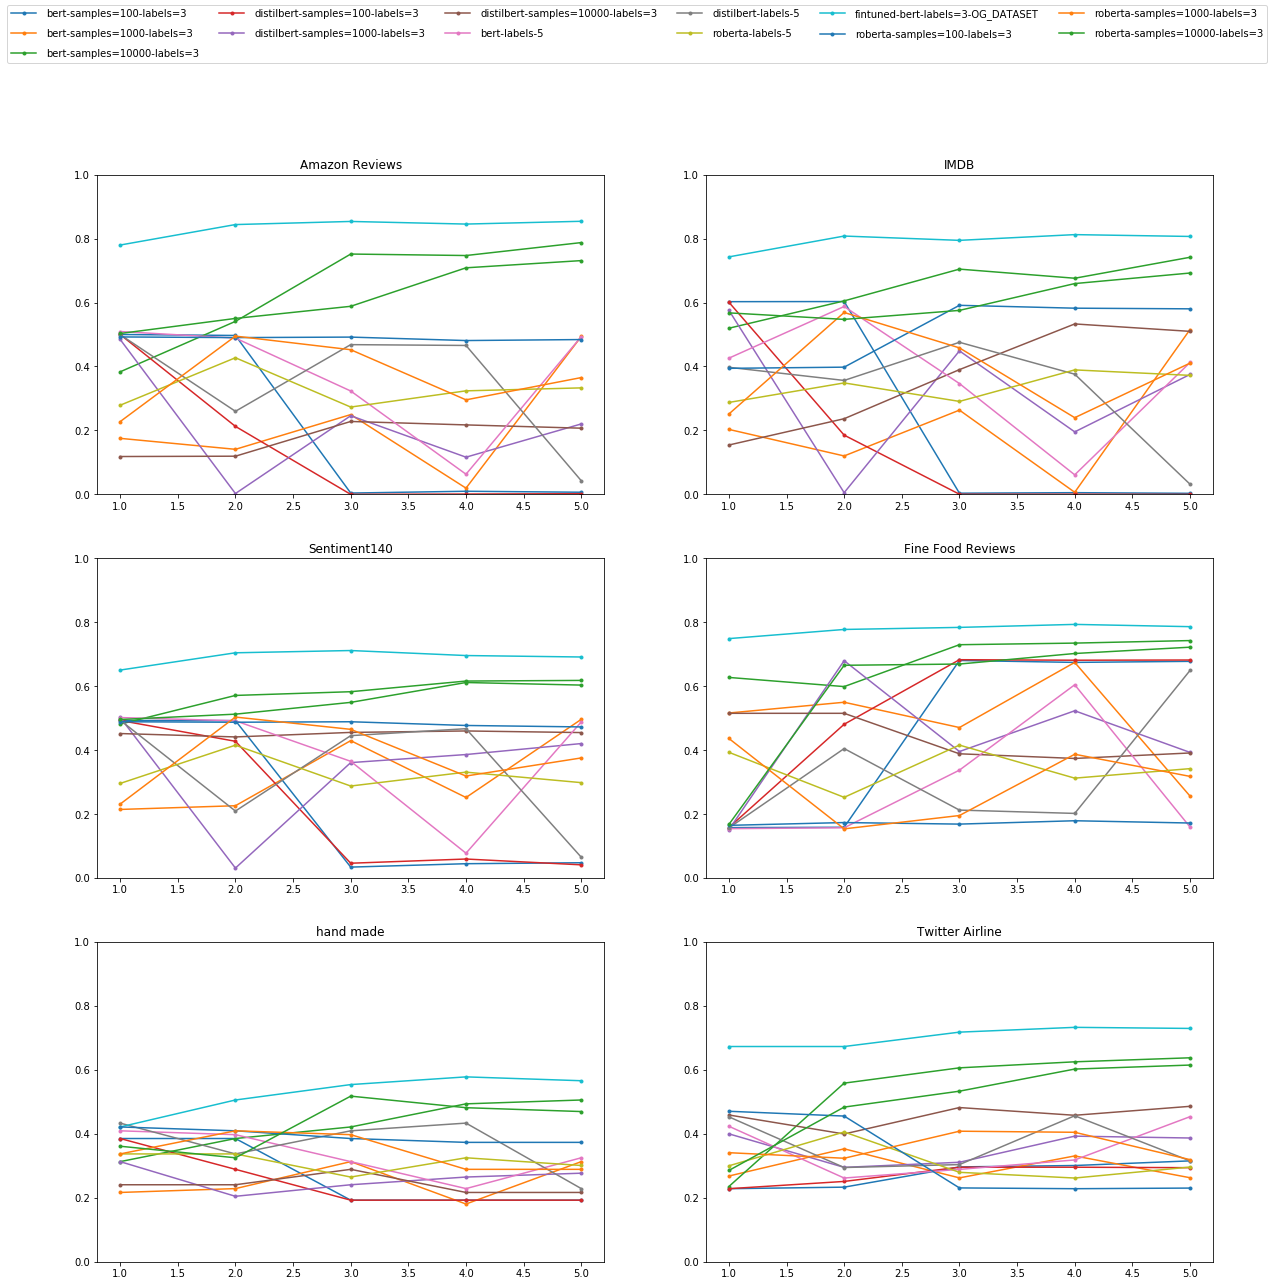

In [2]:
import plot_results
plot_results.plot_results()

Across the board the model that performs the best on all datasets is the best model from the grid search. The second and third models, that have results that are fairly similar, are BERT and RoBERTa models, that are the 10000 sample models from the sample experiment. The 5 label models do not stick out at all and are middle of the pack in terms of performance. While disappointing, this isn't that surprising to me as the 5 label models were trained on data that was not from the same datasets as the test sets. This is further illustrated when we look at the 'hand made' dataset. All models perform worst on this dataset and the common similarity between all the models is that none of them are trained on data that is from the same dataset as that. I did not create a test set for the new dataset because I felt the exisiting one I had was good enough. In the future as a continuation to this project I would combine the original dataset and the new dataset and construct some new test sets from the dataset as well. I would then fine-tune a new batch of models to fit this data.

## OP Text Version 2

I did not mention it above, but when David asked to do the sample experiment, I realised that I was needed to create an encapsulated version of the fine-tuning and testing code as I was writing the same boilerplate code over and over with just the dataset loading being different. It was from this realization that I decided to update the OP Text library and add a fit function for fine-tuning models and a evaluate function for testing models.